In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from ddf.root.to_pandas import get_as_pandas
from ddf.root.to_numpy import get_as_numpy
from ddf.snd.trk import sys_name, alg_name, sys, alg

plt.style.use("ROOT")

input_dir = "/home/idionisov/0_Workdir/muon_flux_PbPb.2023/trkeff/varAng"
x = {
    tt: {
        ang: get_as_pandas(uproot.open(f"{input_dir}/_trkeff_varAng.{ang}_Run7080.root:eff_x_{tt}_7080.tc")) for ang in range(20, 101, 5)
    } for tt in (1, 11, 3, 13)
}

xy_eff_range = {
    'min': {'x': -42., 'y': 19.},
    'max': {'x': -10., 'y': 48.}
}

Welcome to JupyROOT 6.28/04


In [ ]:
angles = list(x[1].keys())  # Extract angle values from the data
cmap = cm.get_cmap('jet', len(angles))
norm = mcolors.Normalize(vmin=min(angles), vmax=max(angles))

fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharey=True, sharex=True)
for i_tt, tt in enumerate((1, 11, 3, 13)):
    ax_i, ax_j = divmod(i_tt, 2)
    for i_ang, ang in enumerate(angles):
        data = x[tt][ang]
        axs[ax_i, ax_j].fill_between(
            data['x'],
            data['y'] - data['eyl'],
            data['y'] + data['eyh'],
            color=cmap(i_ang),
            alpha=0.7,
            label=f'Angle ≤ {ang} mrad'
        )
        axs[ax_i, ax_j].set_ylim(0.3, 1)
        axs[ax_i, ax_j].set_ylabel("Tracking efficiency")
        axs[ax_i, ax_j].set_xlabel("X [cm]")
        axs[ax_i, ax_j].grid()

plt.tight_layout()

# Add a shared colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', shrink=0.8, pad=0.1)
cbar.set_label('Maximum allowed angle [mrad]')

# Update colorbar ticks to show angle values
cbar.set_ticks(angles)
cbar.set_ticklabels([f'{ang}' for ang in angles])


plt.show()

/tmp/ipykernel_59918/4199889223.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet', len(angles))


AttributeError: 'Axes' object has no attribute 'set_grid'

In [ ]:
input_dir = "/home/idionisov/0_Workdir/muon_flux_PbPb.2023/trkeff/varZref"
data = {
    tt: {
        zRef: get_as_pandas(uproot.open(f"{input_dir}/_trkeff_zRef.{zRef}_Run7080.root:eff_x_{tt}_7080.tc")) for zRef in range(350, 546, 5)
    } for tt in (1, 11, 3, 13)
}

/tmp/ipykernel_59820/1189259338.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet', len(z_refs))


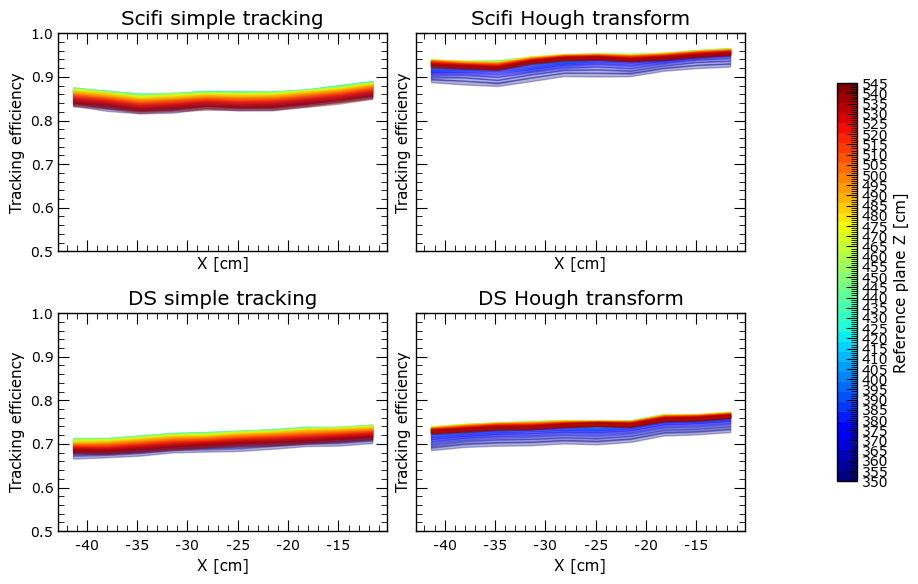

In [ ]:
z_refs = list(data[1].keys())
cmap = cm.get_cmap('jet', len(z_refs))
norm = mcolors.Normalize(vmin=min(z_refs), vmax=max(z_refs))

fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharey=True, sharex=True)
for i_tt, tt in enumerate((1, 11, 3, 13)):
    ax_i, ax_j = divmod(i_tt, 2)
    for i_zRef, zRef in enumerate(z_refs):
        axs[ax_i, ax_j].fill_between(
            data[tt][zRef]['x'],
            data[tt][zRef]['y'] - data[tt][zRef]['eyl'] - 0.003,
            data[tt][zRef]['y'] + data[tt][zRef]['eyh'] + 0.003,
            color=cmap(i_zRef),
            alpha=0.3,
            label=f'$Z_{{ref}}$ = {zRef} cm'
        )
        axs[ax_i, ax_j].set_ylim(0.5, 1)
        axs[ax_i, ax_j].set_title(f"{sys_name(tt)} {alg_name(tt)}")
        axs[ax_i, ax_j].set_ylabel("Tracking efficiency")
        axs[ax_i, ax_j].set_xlabel("X [cm]")

plt.tight_layout()

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', shrink=0.8, pad=0.1)
cbar.set_label('Reference plane Z [cm]')

cbar.set_ticks(z_refs)
cbar.set_ticklabels([f'{zRef}' for zRef in z_refs])

plt.show()

In [ ]:
trkeff_zRef = {tt: {'x': [], 'y': [], 'ey': []} for tt in (1, 11, 3, 13)}

for i_tt, tt in enumerate((1, 11, 3, 13)):
    for i_zRef, zRef in enumerate(z_refs):
        trkeff_zRef[tt]['x'].append(zRef)
    
        y = np.mean(
            get_as_numpy(
                uproot.open(f"{input_dir}/_trkeff_zRef.{zRef}_Run7080.root:eff_x.y_{tt}_7080.tc"),
                x_range=(xy_eff_range['min']['x'], xy_eff_range['max']['x']),
                y_range=(xy_eff_range['min']['y'], xy_eff_range['max']['y'])
            )[0]
        )
        ey = np.std(
            get_as_numpy(
                uproot.open(f"{input_dir}/_trkeff_zRef.{zRef}_Run7080.root:eff_x.y_{tt}_7080.tc"),
                x_range=(xy_eff_range['min']['x'], xy_eff_range['max']['x']),
                y_range=(xy_eff_range['min']['y'], xy_eff_range['max']['y'])
            )[0]
        )

        trkeff_zRef[tt]['y'].append(y)
        trkeff_zRef[tt]['ey'].append(ey)

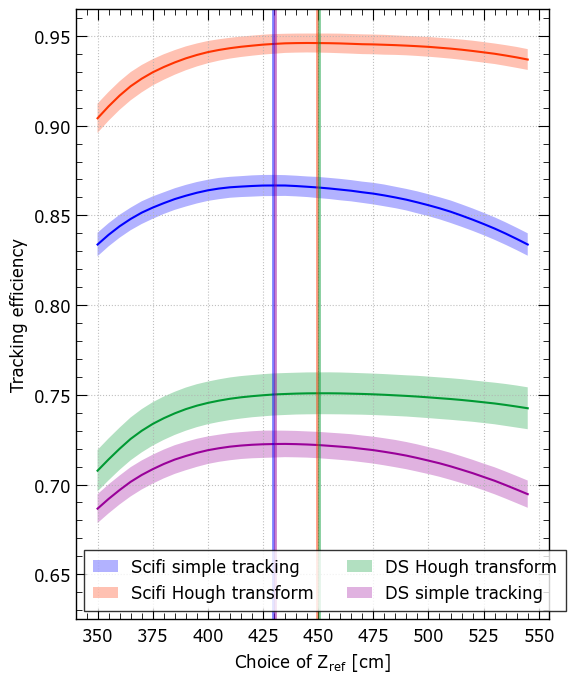

In [ ]:
fig = plt.figure(figsize=(6, 7))

for i_tt, tt in enumerate((1, 11, 13, 3)):
    # Convert to numpy arrays explicitly
    x = np.array(trkeff_zRef[tt]['x'])
    y = np.array(trkeff_zRef[tt]['y'])
    ey = np.array(trkeff_zRef[tt]['ey'])/2
    
    plt.plot(x, y, linestyle="-")
    plt.fill_between(x, y - ey, y + ey, alpha=0.3, label=f'{sys_name(tt)} {alg_name(tt)}')

plt.vlines(429.5, 0, 1, color="#0000ff", linestyle="-", linewidth=2, alpha=0.5)
plt.vlines(430.5, 0, 1, color="#990099", linestyle="-", linewidth=2, alpha=0.5)
plt.vlines(449.5, 0, 1, color="#ff3300", linestyle="-", linewidth=2, alpha=0.5)
plt.vlines(450.5, 0, 1, color="#009933", linestyle="-", linewidth=2, alpha=0.5)

plt.xlabel("Choice of $Z_{ref}$ [cm]", fontsize=12)
plt.ylabel("Tracking efficiency", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(0.625, 0.965)

# plt.xlim(425, 475)
#plt.ylim(0.68, 0.77)

plt.grid(axis="both")
plt.legend(fontsize=12, ncols=2)
plt.tight_layout()

plt.show()

In [ ]:
run = 7080

eff = {}; deff = {}
xy = {}; xy_edges_x = {}; xy_edges_y = {}; X = {}; Y = {}
for i_f, f in enumerate(files):
    xy[i_f] = {}; xy_edges_x[i_f] = {}; xy_edges_y[i_f] = {}; X[i_f] = {}; Y[i_f] = {}
    eff[i_f] = {}; deff[i_f] = {}
    
    for tt in (1, 11, 3, 13):
        eff[i_f][tt] = np.mean(get_as_numpy(
            uproot.open(f"{f}:eff_x.y_{tt}_{run}.tc"),
            x_range=(xy_eff_range['min']['x'], xy_eff_range['max']['x']),
            y_range=(xy_eff_range['min']['y'], xy_eff_range['max']['y'])
        )[0])
        deff[i_f][tt] = np.std(get_as_numpy(
            uproot.open(f"{f}:eff_x.y_{tt}_{run}.tc"),
            x_range=(xy_eff_range['min']['x'], xy_eff_range['max']['x']),
            y_range=(xy_eff_range['min']['y'], xy_eff_range['max']['y'])
        )[0])

        xy[i_f][tt], xy_edges_x[i_f][tt], xy_edges_y[i_f][tt] = get_as_numpy(uproot.open(f"{f}:eff_x.y_{tt}_{run}.tc"))
        X[i_f][tt], Y[i_f][tt] = np.meshgrid(xy_edges_x[i_f][tt], xy_edges_y[i_f][tt])

NameError: name 'files' is not defined